# Predicting heart disease using machine learning 

This notebook looks into various python-based machine lerning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. problem definition
2. data
3. evaluation
4. features
5. modelling 
6. experimentation

## Problem definition

In a statement,
given clinical parameters about a patient can we predict, that a patient has heart disease or not.


## Data

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# model from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## load data

In [2]:
df = pd.read_csv("./data/heart-disease.csv")

In [3]:
df.shape

(303, 14)

## Data exploration 

The goal here is to find out more about the data and become a subject matter expert on the dataset.

1. What problem are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

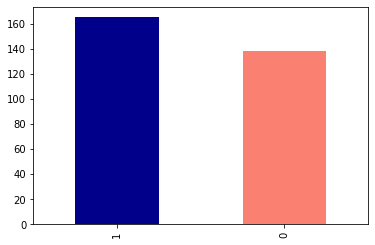

In [6]:
df["target"].value_counts().plot(kind = "bar", color = ["darkblue", "salmon"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### heart disease frequency determined by sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


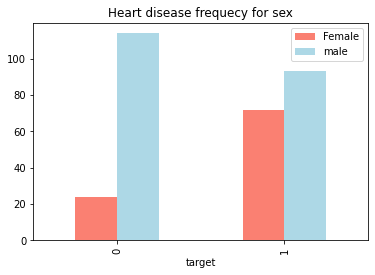

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", color = ["salmon", "lightblue"])
plt.title("Heart disease frequecy for sex")
plt.legend(["Female", "male"])

In [11]:
pd.crosstab(df.age, df.thalach)

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
age,,,,,,,,,,,,,,,,,,,,,
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


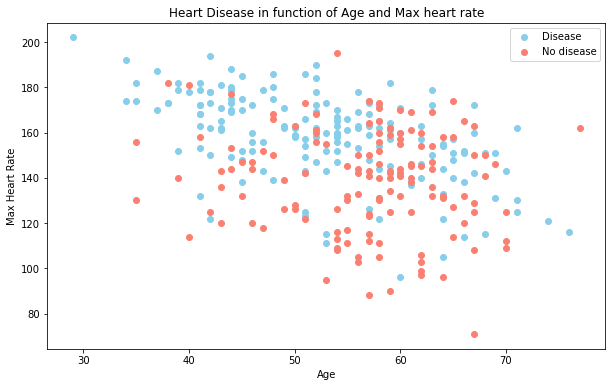

In [12]:
# Create another figure 
plt.figure(figsize = (10, 6))

# Scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "skyblue")

# scatter with negativ example
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "salmon")

# Add some helpful info 
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])

<AxesSubplot:ylabel='Frequency'>

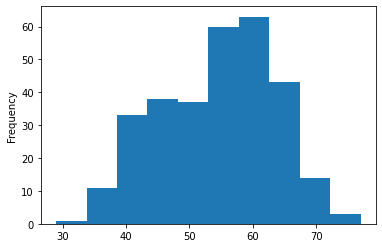

In [13]:
# Check the distribution of the age
df.age.plot.hist()

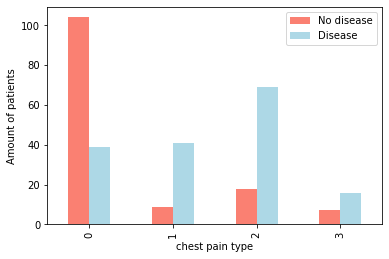

In [14]:
# Chest pain vs target column
pd.crosstab(df.cp, df.target).plot(kind = "bar",color = ["salmon", "lightblue"])

# Add some title
plt.xlabel("chest pain type")
plt.ylabel("Amount of patients")
plt.legend(["No disease", "Disease"])



### building a coorealtion matrix

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


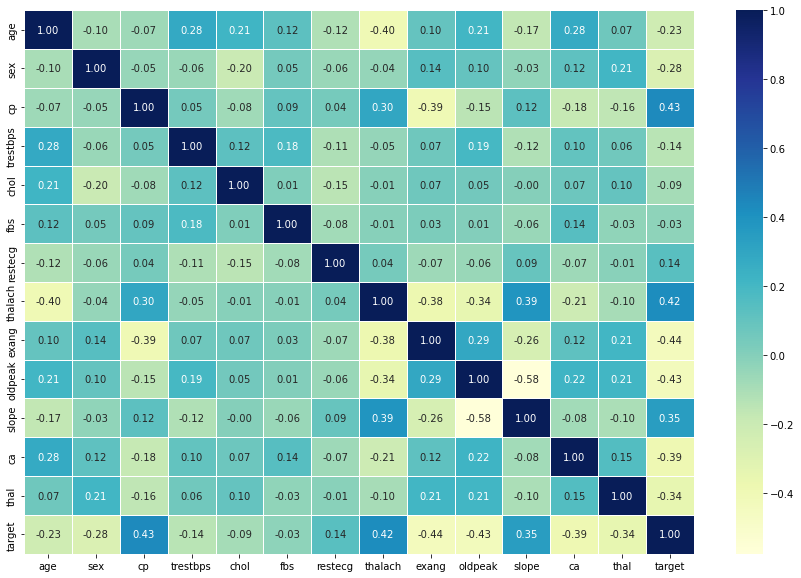

In [16]:
# let's make our correlation matrix prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, 
                annot = True, 
                linewidths = 0.5, 
                fmt = ".2f", 
                cmap = "YlGnBu");

## Modelling


In [17]:
# Split data into X and y

X = df.drop("target", axis = 1)
y = df["target"]

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
# Split data into train and test set
np.random.seed(19)

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [20]:
y_train

210    0
117    1
209    0
144    1
146    1
      ..
159    1
19     1
245    0
110    1
93     1
Name: target, Length: 242, dtype: int64

### We are going to try 3 differernt machine learning model

1. Logistic Regression
2. K Nearest Neighbors
3. Randomforestclassifier


In [21]:
# Put models in a dictionary 
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    
    return model_score

In [22]:
model_score = fit_and_score(models = models,
                           X_train = X_train,
                           X_test = X_test,
                           y_train = y_train,
                            y_test = y_test
                           )
model_score

C:\Users\Acer\Documents\heartdisease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8032786885245902}

## Model Comparison

In [23]:
model_compare = pd.DataFrame(model_score, index = ["accuracy"])

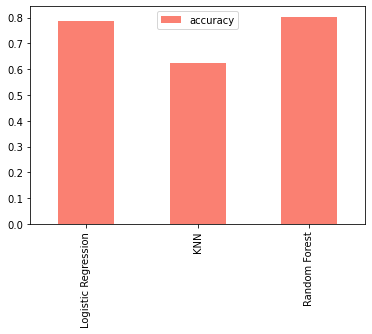

In [24]:
model_compare.T.plot.bar(color = 'salmon');

Now we have a baseline model. Now we are going to do the following

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve(AUC)


### Hyperparameter tuning

In [25]:
# Let's tune knn

train_scores = []
test_scores = []

neighbors = range(1, 21)


knn = KNeighborsClassifier()


for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [26]:
test_scores

[0.5409836065573771,
 0.5409836065573771,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803]

In [27]:
train_scores

[1.0,
 0.8181818181818182,
 0.7933884297520661,
 0.7768595041322314,
 0.7520661157024794,
 0.7727272727272727,
 0.7479338842975206,
 0.731404958677686,
 0.7107438016528925,
 0.731404958677686,
 0.7231404958677686,
 0.743801652892562,
 0.7231404958677686,
 0.731404958677686,
 0.7066115702479339,
 0.7024793388429752,
 0.6942148760330579,
 0.7066115702479339,
 0.7107438016528925,
 0.7107438016528925]

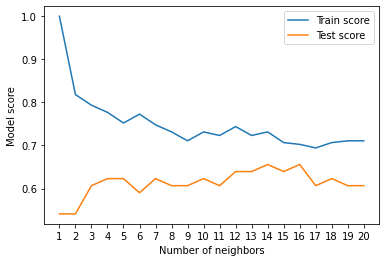

In [28]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label  = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

#print(f"Maximum KNN score on the test data: {max(test_scores*100:.2f)}%")

## Hyperparameter tuning with randomized search CV

We are going to tune 
1. logistic regression 
2. randomforest classifier

In [29]:
# Create a hyperparameter grid for logistic regression 

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" :[None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [30]:
# tune logistic regresssion

np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test, y_test)

0.7704918032786885

In [33]:
# Now we tune randomforestclassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5, 
                           n_iter = 20,
                           verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [35]:
rs_rf.score(X_test, y_test)

0.7540983606557377

### Hyperparameter tuning with GridSearchCV 

Since our logistics regression model provides the best scores so far, we'll try to improve them using GridSearchCV

In [36]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogistcRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# Evaluate the grid search logistic regression model
gs_log_reg.score(X_test, y_test)

0.7868852459016393

In [39]:
model_score

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8032786885245902}

## Evaluating our tuned machine classifier beyond accuracy 

1. ROC curve and AUC curve
2. Confusion matrix
3. Classification report
4. Precision 
5. Recall
6. F-1 score

In [40]:
# Make prediction with our tuned model

y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [42]:
y_test

137    1
27     1
8      1
189    0
138    1
      ..
254    0
240    0
90     1
235    0
241    0
Name: target, Length: 61, dtype: int64

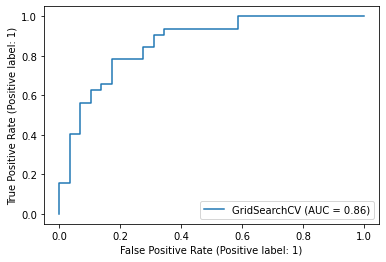

In [43]:
# import ROC curve and plot roc curve

plot_roc_curve(gs_log_reg, X_test, y_test)

In [44]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))


[[21  8]
 [ 5 27]]


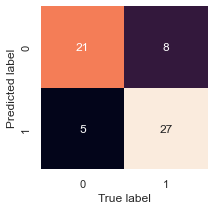

In [45]:
sns.set()

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix
    """
    fig, ax = plt.subplots(figsize =(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()

plot_conf_mat(y_test, y_preds)

Now we have ROC curve and confusion matrix. let's get a cross validated classification report as well as precision f1 and recall

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



### Calculate evaluation matrix using cross validation

We are going to calculate precision, recall, f-1 by cross validation

In [47]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Create a model with the best parameters
clf = LogisticRegression(C = .204333597178569418,
                        solver = "liblinear")

In [49]:
# Cross- validated accuracy 
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")

In [50]:
print(cv_acc)
np.mean(cv_acc)

[0.81967213 0.90163934 0.8852459  0.88333333 0.75      ]


0.8479781420765027

In [51]:
# Cross - validated precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [52]:
# Cross validated Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [53]:
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

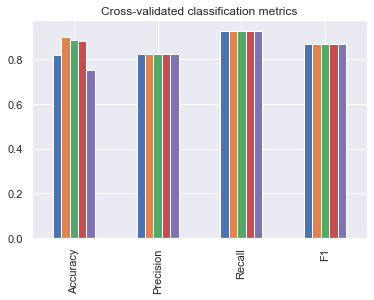

In [54]:
# Visualize the cross validated metrics 
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                         )

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                     legend = False);

### Feature Importance

It is another way of asking, "WHich features contributed most to the outcome of the model and how did they contribute ?"

In [55]:
# IT is different for different machine learning model

clf = LogisticRegression(C = 0.2433597178569418,
                        solver = "liblinear")

clf.fit(X_train, y_train);

In [56]:
clf.coef_

array([[ 0.00272276, -0.801026  ,  0.70479779, -0.01604482, -0.00167019,
        -0.17890057,  0.18180909,  0.02817664, -0.44494363, -0.66634222,
         0.5599802 , -0.61926655, -0.67286908]])

In [57]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0027227551661747514,
 'sex': -0.8010259996249844,
 'cp': 0.7047977930154075,
 'trestbps': -0.01604481864785886,
 'chol': -0.0016701879719968698,
 'fbs': -0.17890057405837315,
 'restecg': 0.18180909354390726,
 'thalach': 0.028176636574625564,
 'exang': -0.4449436250851603,
 'oldpeak': -0.666342221178201,
 'slope': 0.5599802002022112,
 'ca': -0.6192665520273469,
 'thal': -0.6728690813337442}

<AxesSubplot:title={'center':'Feature Importance'}>

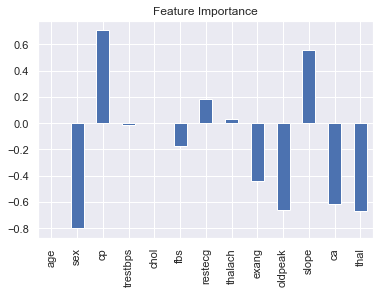

In [59]:
# Visualizing feature importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False)

In [60]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [61]:
### Reviewing our model

In [63]:
# Exporting your model